## 도미 데이터 준비 (길이, 무게)

In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

## 도미 데이터 시각화

<function matplotlib.pyplot.show(close=None, block=None)>

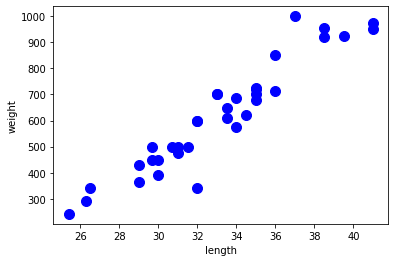

In [ ]:
import matplotlib.pyplot as plt #matplotlib 의 pyplot 함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight) 
plt.xlabel('length')
plt.ylabel('weight')
plt.show

## 빙어 데이터 준비 & 도미랑 같이 시각화

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

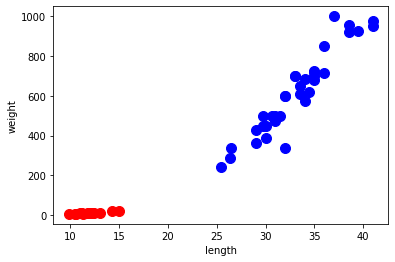

In [ ]:
plt.scatter(bream_length, bream_weight,100,'blue')# 크기,색상
plt.scatter(smelt_length, smelt_weight,100,'red')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 도미, 빙어 데이터 합치기

In [ ]:
length = bream_length+smelt_length
weight = bream_weight+smelt_weight
fish_data = [[l, w] for l, w in zip(length, weight)]
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


## 정답 데이터 만들기 (타겟)& k 최근접 이웃 알고리즘 꺼내오기

In [ ]:
fish_target = [1]*35 + [0]*14
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier() # 객체 만들기

## 알고리즘 훈련,모델 평가하기

In [ ]:
kn.fit(fish_data, fish_target)
kn.score(fish_data, fish_target)

1.0

## k-최근접 이웃 알고리즘
#### 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용

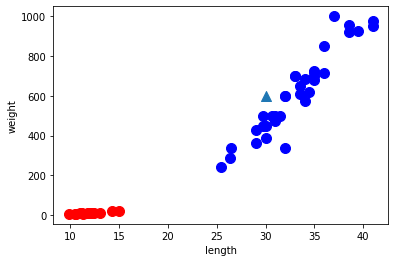

array([1])

In [ ]:
plt.scatter(bream_length, bream_weight,100,'blue')# 크기,색상
plt.scatter(smelt_length, smelt_weight,100,'red')
plt.scatter(30, 600, 100,marker='^')# 예측 데이터가 어디 있는지 확인
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

kn.predict([[30,600]]) #훈련된 모델을 이용하여 예측하기


## 참고 데이터의 개수 바꾸기
#### KNeighborsClassifier의 기본값은 5 -->49로 바꾸면

In [ ]:
kn49 = KNeighborsClassifier(n_neighbors = 49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target) # 1.0 에서 0.7로 정확도가 줄어들었음

0.7142857142857143

In [ ]:
print(35/49) # 도미 비율

0.7142857142857143


## 언제부터 정확도가 1.0 이하로 떨어지는지 확인

In [ ]:
for n in range(5, 50):
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
